In [1]:
# Import dati dalla prof
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
import RisolviSis as RS
import matplotlib.pyplot as plt
dati = loadmat('testE.mat')
A=dati["A"] 
b=dati["b"]


# Jacobi

In [2]:
def jacobi(A, b, x0, toll, itmax):
    n = A.shape[0]
    # Estraggo la diagonale dalla matrice A, costruisco la matrice diagonale
    d = np.diag(A)
    D = np.diag(d)
    # Creo la matrice triangolare inferiore da A, -1 perchè escludo la diagonale
    E = np.tril(A, - 1)
    # Estraggo dalla matrice A la sua matrice triangolare superiore, 
    # con diagonale esclusa
    F = np.triu(A, 1)

    # Decomposizione adottata nel metodo di Jacobi: si tiene a mente che M = D
    N = - (E + F)

    # Cercando il raggio spettrale, devo vedere che questo sia minore di 1 
    # affinché ci sia una veloce convergenza del metodo iterativo.
    invM = np.diag(1 / d)
    T = np.dot(invM, N)

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale: ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. 
    # Tengo traccia del vettore degli errori per poi fare un grafico 
    # rappresentativo.
    it = 0
    err_vet = []
    err = 1000

    while it <= itmax and err >= toll:
        x = (b + np.dot(N, x0)) / d.reshape(n, 1)
        # Se c'è convergenza le soluzioni non cambiano più
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        # Al passo successivo, x0 sarà la x del passo precedente
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:  0.9997193113493907
Soluzione:    [[8.99279621e-01]
 [8.03220479e-01]
 [7.14349387e-01]
 [6.29432376e-01]
 [5.53322600e-01]
 [4.80462632e-01]
 [4.17309198e-01]
 [3.56738665e-01]
 [3.06035512e-01]
 [2.57314444e-01]
 [2.17970305e-01]
 [1.80092847e-01]
 [1.50611692e-01]
 [1.22175870e-01]
 [1.00860069e-01]
 [8.02611226e-02]
 [6.53994858e-02]
 [5.10103859e-02]
 [4.10246060e-02]
 [3.13379437e-02]
 [2.48753514e-02]
 [1.85943965e-02]
 [1.45680764e-02]
 [1.06474492e-02]
 [8.23390178e-03]
 [5.87921576e-03]
 [4.48793308e-03]
 [3.12797959e-03]
 [2.35717274e-03]
 [1.60227636e-03]
 [1.19207780e-03]
 [7.89573413e-04]
 [5.80019956e-04]
 [3.74000796e-04]
 [2.71302188e-04]
 [1.70140693e-04]
 [1.21890325e-04]
 [7.42701895e-05]
 [5.25542973e-05]
 [3.10806006e-05]
 [2.17256616e-05]
 [1.24574608e-05]
 [8.60385108e-06]
 [4.77985502e-06]
 [3.26476963e-06]
 [1.76277765e-06]
 [1.19974433e-06]
 [6.54347831e-07]
 [4.72766344e-07]
 [3.38570974e-07]
 [3.38570974e-07]
 [4.72766343e-07]
 [6.54347831

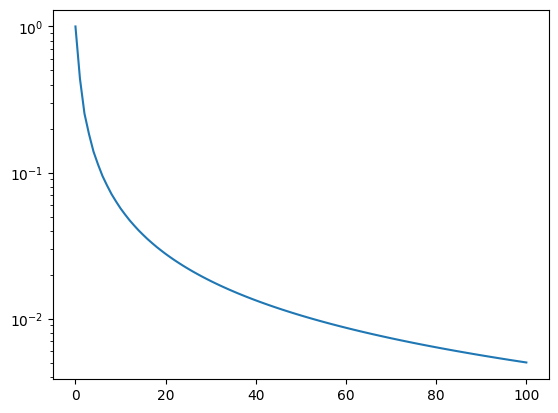

In [3]:
n = A.shape[0]

# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
xJ, itJ, err_vetJ = jacobi(A, b, x0, toll, itmax)

print("Soluzione:   ", xJ)
print("Iterazioni:  ", itJ)

plt.semilogy(np.arange(itJ), err_vetJ)
plt.show()


# Gauss-Siedel

In [4]:
def gauss_seidel(A, b, x0, toll, itmax):
    d = np.diag(A)
    # Estraggo la diagonale dalla matrice A, costruisco la matrice diagonale
    D = np.diag(d)
    # Creo la matrice triangolare inferiore da A, -1 perchè escludo la diagonale
    E = np.tril(A, - 1)
    # Estraggo dalla matrice A la sua matrice triangolare superiore, 
    # con diagonale esclusa
    F = np.triu(A, 1)

    # Decomposizione adottata nel metodo di Gauss-Siedel:
    M = D + E
    N = -F

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    invM = np.linalg.inv(M)
    T = np.dot(invM, N)
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale: ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. 
    # Tengo traccia del vettore degli errori per poi fare un grafico 
    # rappresentativo.
    it = 0
    err_vet = []
    err = 1000

    while it <= itmax and err >= toll:
        temp = b - np.dot(F, x0)
        x, flag = RS.Lsolve(M, temp)
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:  0.9994387014848954
Soluzione GS:     [[9.21551458e-01]
 [8.47261363e-01]
 [7.77102101e-01]
 [7.11030464e-01]
 [6.48987260e-01]
 [5.90897396e-01]
 [5.36670389e-01]
 [4.86201235e-01]
 [4.39371584e-01]
 [3.96051151e-01]
 [3.56099315e-01]
 [3.19366825e-01]
 [2.85697587e-01]
 [2.54930451e-01]
 [2.26900983e-01]
 [2.01443160e-01]
 [1.78390970e-01]
 [1.57579892e-01]
 [1.38848229e-01]
 [1.22038286e-01]
 [1.06997388e-01]
 [9.35787338e-02]
 [8.16420843e-02]
 [7.10542958e-02]
 [6.16897043e-02]
 [5.34303727e-02]
 [4.61662118e-02]
 [3.97949903e-02]
 [3.42222473e-02]
 [2.93611214e-02]
 [2.51321098e-02]
 [2.14627722e-02]
 [1.82873905e-02]
 [1.55465969e-02]
 [1.31869799e-02]
 [1.11606787e-02]
 [9.42497310e-03]
 [7.94187568e-03]
 [6.67773325e-03]
 [5.60284117e-03]
 [4.69107503e-03]
 [3.91954259e-03]
 [3.26825843e-03]
 [2.71984326e-03]
 [2.25924933e-03]
 [1.87351334e-03]
 [1.55153812e-03]
 [1.28390433e-03]
 [1.06271388e-03]
 [8.81466852e-04]
 [7.34974356e-04]
 [6.19310033e-04]
 [5.3180

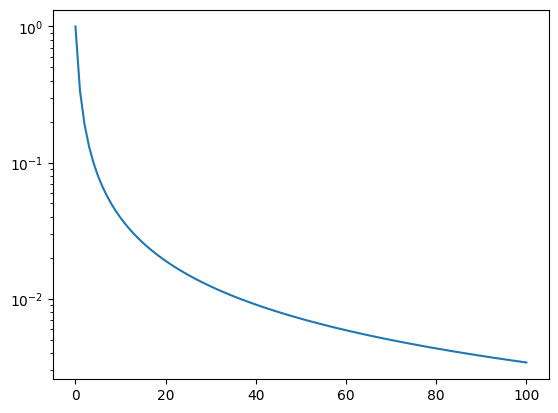

In [5]:
# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
itmax = 100
toll = 1e-8
xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)

print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()


# Gauss-Siedel SOR

In [6]:
def gauss_seidel_sor(A, b, x0, omega, toll, itmax):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    Dinv = np.diag(1/d)
    # Estraggo la diagonale dalla matrice A, costruisco la matrice diagonale.
    E = np.tril(A, -1)
    # Creo la matrice triangolare inferiore da A, -1 perchè escludo la diagonale.
    F = np.triu(A, 1)

    # Decomposizione adottata nel metodo di Gauss-Siedel SOR: devo introdurre 
    # un parametro omega che riduca il più possibile il raggio spettrale.
    M_omega = D + omega * E
    N_omega = (1 - omega) * D - omega * F
    T = np.dot(np.linalg.inv(M_omega), N_omega)
    M = D + E
    N = -F

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo.
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni. 
    # Tengo traccia del vettore degli errori per poi fare un grafico 
    # rappresentativo.
    it = 0
    x_old = x0.copy()
    x_new = x0.copy()
    er_vet = []

    while it <= itmax and errore >= toll:
        temp = b - np.dot(F, x_old)
        x_tilde, flag = RS.Lsolve(M, temp)
        # Il parametro omega agisce qui per accelerare la convergenza
        x_new = (1 - omega) * x_old + omega * x_tilde
        errore = np.linalg.norm(x_new - x_old) / np.linalg.norm(x_new)
        er_vet.append(errore)
        x_old = x_new.copy()
        it += 1
    return x_new, it, er_vet


raggio spettrale Gauss-Seidel SOR  0.998689976147869
Soluzione GSS:     [[0.93014462]
 [0.86384231]
 [0.80101231]
 [0.74157131]
 [0.68543293]
 [0.6325074 ]
 [0.5827014 ]
 [0.53591811]
 [0.49205727]
 [0.45101549]
 [0.41268657]
 [0.37696192]
 [0.34373105]
 [0.31288208]
 [0.28430227]
 [0.25787863]
 [0.23349841]
 [0.21104968]
 [0.19042186]
 [0.17150619]
 [0.15419618]
 [0.13838807]
 [0.12398109]
 [0.11087796]
 [0.09898493]
 [0.08821225]
 [0.07847408]
 [0.06968891]
 [0.06177935]
 [0.05467242]
 [0.04829936]
 [0.04259578]
 [0.03750141]
 [0.03296022]
 [0.02892011]
 [0.02533295]
 [0.02215435]
 [0.01934355]
 [0.01686322]
 [0.01467939]
 [0.0127612 ]
 [0.01108082]
 [0.00961327]
 [0.00833632]
 [0.00723035]
 [0.00627827]
 [0.00546545]
 [0.00477962]
 [0.00421089]
 [0.00375173]
 [0.00339695]
 [0.00314382]
 [0.00299207]
 [0.00294403]
 [0.00300475]
 [0.00318215]
 [0.00348722]
 [0.00393415]
 [0.00454062]
 [0.00532796]
 [0.00632143]
 [0.00755039]
 [0.0090486 ]
 [0.01085439]
 [0.01301083]
 [0.01556597]
 [0.

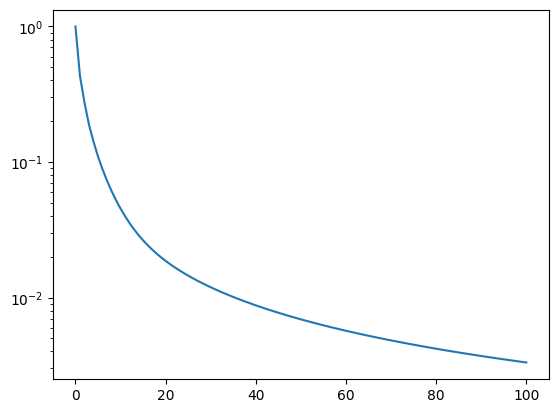

In [7]:
n = A.shape[0]

# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))

# omega deve avere un valore tra 0 e 2
omega = 1.4
itmax = 100
toll = 1e-8
xG, itG, err_vetG = gauss_seidel_sor(A, b, x0, omega, toll, itmax)

print("Soluzione GSS:    ", xG)
print("Iterazioni GSS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG)
plt.show()


# Gradiente

In [8]:
def steepestdescent(A, b, x0, itmax, toll):
    x = x0
    r = A.dot(x) - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = []
    vec_sol.append(x)
    vet_r = []
    vet_r.append(errore)

    while errore >= toll and it < itmax:
        it += 1
        Ap = A.dot(p)
        rTr = np.dot(r.T, r)
        alpha = rTr / np.dot(p.T, Ap)
                
        x = x + alpha * p
        vec_sol.append(x)
        r = r + alpha * Ap
        errore = np.linalg.norm(r) / nb
        vet_r.append(errore)
        p = -r 
        
    
    return x, vet_r, vec_sol, it


Condizionameto di A 7303.551123795182
Iterazioni Gradiente  10000


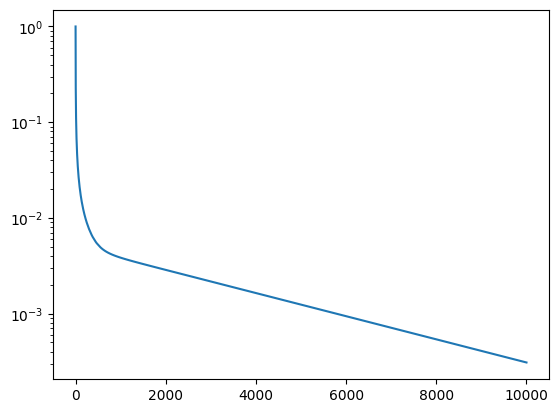

In [9]:
# Indice di condizionamento della matrice A
print("Condizionameto di A", np.linalg.cond(A))

toll = 1e-8
it_max = 10000
x0 = np.zeros_like(b)

x_gr, vet_r_gr, vec_sol_gr, itG = steepestdescent(A, b, x0, it_max, toll)
print("Iterazioni Gradiente ",itG)
plt.semilogy(np.arange(itG + 1), vet_r_gr)


# Gradiente Coniugato

In [10]:
def conjugate_gradient(A, b, x0, itmax, toll):
    x = x0
    r = A.dot(x) - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = []
    vec_sol.append(x0)
    vet_r = []
    vet_r.append(errore)

    while errore >= toll and it < itmax:
        it += 1
        Ap = A.dot(p)
        rtr = np.dot(r.T, r)
        alpha = rtr / np.dot(p.T, Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r = r + alpha * Ap
        gamma = np.dot(r.T,r) / rtr
        errore = np.linalg.norm(r) / nb
        vet_r.append(errore)
        p = -r + gamma * p
    
    return x, vet_r, vec_sol, it


Condizionameto di A 7303.551123795182
Iterazioni Gradiente Coniugato  10000
7303.551123795182


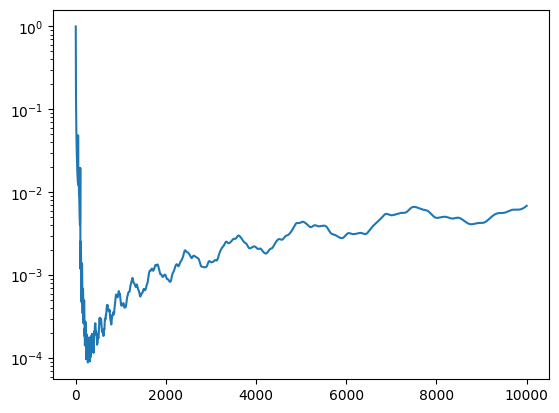

In [11]:
# Indice di condizionamento della matrice A
print("Condizionameto di A", np.linalg.cond(A))

toll=1e-8
it_max=10000
x0 = np.zeros_like(b)

x_cg, vet_r_cg, vec_sol_cg, itCG = conjugate_gradient(A, b, x0, it_max, toll)
print("Iterazioni Gradiente Coniugato ",itCG)

plt.semilogy(np.arange(itCG + 1), vet_r_cg)